<a href="https://colab.research.google.com/github/mahedishato/DL/blob/main/data_augmentation_dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle #Easily start kaggle in google colab
!cp kaggle.json ~/.kaggle/ #to download kaggle data in Google Colab

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats  #kaggle dataset API

100% 1.06G/1.06G [00:55<00:00, 22.9MB/s]
100% 1.06G/1.06G [00:55<00:00, 20.6MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/Datasets/DL')
zip_ref.close()

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale=1./255)

train_generotor = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/DL/train', target_size=(150,150),
                                                    batch_size=batch_size, class_mode='binary')


validation_gen= test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/DL/test', target_size=(150,150),
                                                    batch_size=batch_size, class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dense, Dropout,Flatten

In [9]:
model= Sequential()

model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))




In [10]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [12]:
from numpy import matrix
import keras
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
model.fit_generator(train_generotor,
                    steps_per_epoch=2000//batch_size,
                    epochs=25,
                    validation_data=validation_gen,validation_steps=800//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/25
125/125 [==============================] - 37s 222ms/step - loss: 0.6967 - accuracy: 0.5165 - val_loss: 0.7037 - val_accuracy: 0.4550
Epoch 2/25
125/125 [==============================] - 23s 183ms/step - loss: 0.6719 - accuracy: 0.5915 - val_loss: 0.6372 - val_accuracy: 0.6237
Epoch 3/25
125/125 [==============================] - 23s 179ms/step - loss: 0.6433 - accuracy: 0.6305 - val_loss: 0.7399 - val_accuracy: 0.5738
Epoch 5/25
125/125 [==============================] - 21s 165ms/step - loss: 0.6181 - accuracy: 0.6725 - val_loss: 0.5704 - val_accuracy: 0.7138
Epoch 6/25
125/125 [==============================] - 22s 178ms/step - loss: 0.6174 - accuracy: 0.6760 - val_loss: 0.5851 - val_accuracy: 0.6725
Epoch 7/25
125/125 [==============================] - 22s 179ms/step - loss: 0.5765 - accuracy: 0.7030 - val_loss: 0.6094 - val_accuracy: 0.6988
Epoch 8/25
125/125 [==============================] - 21s 170ms/step - loss: 0.5636 - accuracy: 0.7100 - val_loss: 0.5323 - val_ac

In [14]:
model.save('/content/drive/MyDrive/Datasets/DL/bestmodel.h5')

In [15]:
model_score = keras.models.load_model('/content/drive/MyDrive/Datasets/DL/bestmodel.h5')

In [18]:
import cv2

In [19]:
test_img = cv2.imread('/content/drive/MyDrive/Datasets/DL/test/cats/cat.10000.jpg')

In [21]:
import matplotlib.pyplot as plt


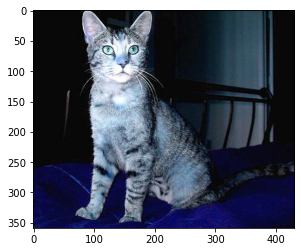

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(359, 431, 3)

In [26]:
test_img = cv2.resize(test_img,(150,150))

In [28]:
test_input = test_img.reshape((1,150,150,3))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 193ms/step


array([[0.]], dtype=float32)